In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [5]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [6]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [7]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

In [8]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

<BarContainer object of 26 artists>

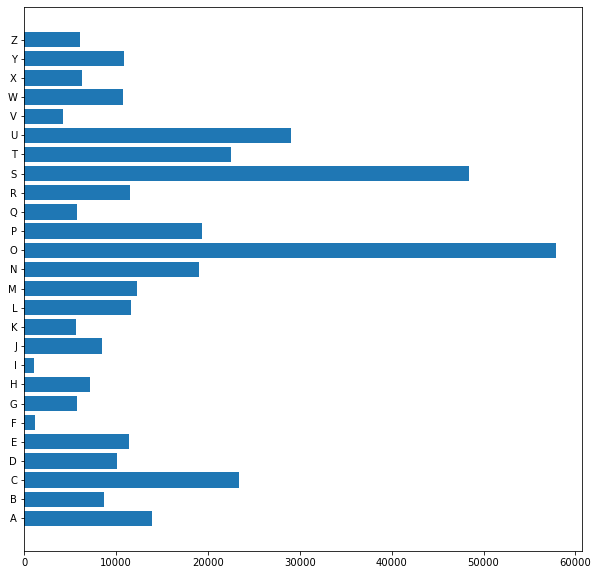

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

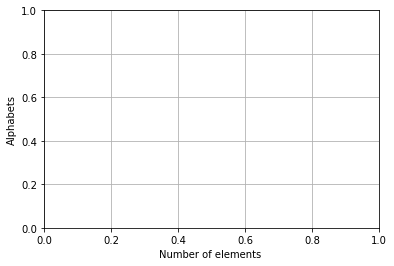

In [10]:
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [11]:
shuff = shuffle(train_x[:100])

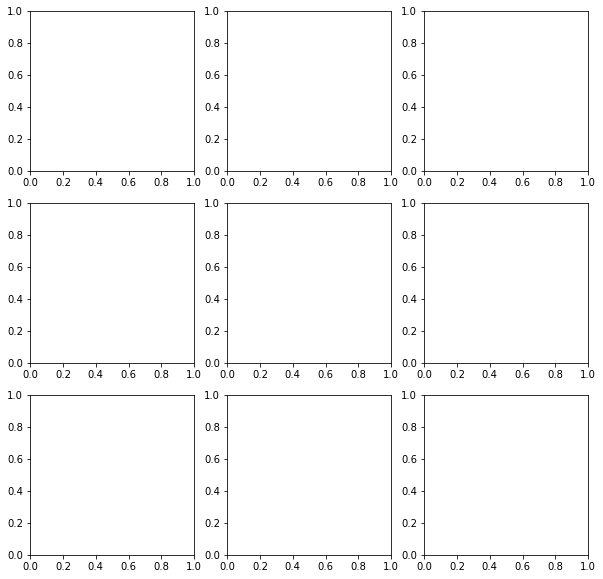

In [12]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

In [13]:
for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [14]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

New shape of train data:  (297960, 28, 28, 1)


In [15]:
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (74490, 28, 28, 1)


In [16]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

New shape of train labels:  (297960, 26)


In [17]:
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of test labels:  (74490, 26)


In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))


In [19]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [20]:
history = model.fit(train_X, train_yOHE, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 268s 29ms/step - loss: 0.1594 - accuracy: 0.9577 - val_loss: 0.0794 - val_accuracy: 0.9778


In [21]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [22]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9777956604957581]
The training accuracy is : [0.9576621055603027]
The validation loss is : [0.07939662784337997]
The training loss is : [0.1593886911869049]


In [23]:
pred = model.predict(test_X[:9])
print(test_X.shape)

(74490, 28, 28, 1)


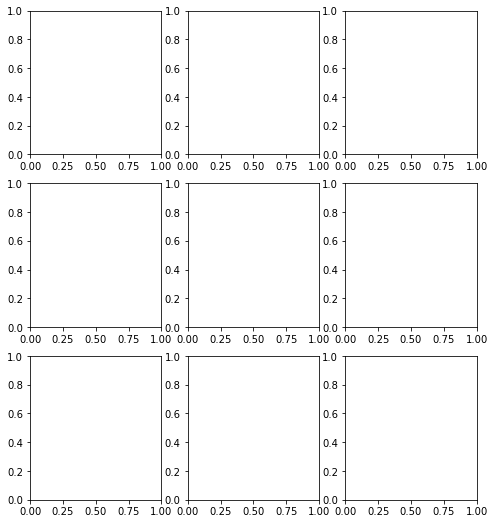

In [24]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

In [178]:
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [179]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

In [180]:
width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

In [181]:
def save():
    # save image to hard drive
    filename = "user_input.jpg"
    output_image.save(filename)

In [182]:
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

In [183]:
master = Tk()

In [184]:
# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

In [185]:
# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

'1471239440704paint'

In [186]:
# add a button to save the image
button=Button(text="save",command=save)
button.pack()

In [ ]:
master.mainloop()

In [171]:
img = cv2.imread(r'user_input.jpg')
img_copy = img.copy()

In [172]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [173]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

In [174]:
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [175]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

In [176]:
cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

In [177]:

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()